<h1 style="text-align: center">
    <hr>
    <a href="https://docs.google.com/document/d/1OMFp9MbZXCRRz_kp3Y83raB6K5aCTJd67Ojw6Y6-U1M/edit?usp=sharing">
        Thesis Doc 
    </a>
    <hr>
</h1>

In [1]:
# util library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# preprocessors
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder



from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

warnings.filterwarnings('ignore')  

In [2]:
# for colorful outputs
from IPython.display import Markdown, display
def pretty(string,col="#7287fd"):
    styles = f"color: {col}; font-size: 2em;"
    display(Markdown(f'<div style="{styles}">{string}</div>'))

# <i style="font-size: 2em">🔖</i>1 - Loading csv into Pandas DataFrame  <i style="font-size: 5em">🐼</i>

In [3]:
df = pd.read_csv('../input/loan-prediction-based-on-customer-behavior/Training Data.csv')
df.shape

(252000, 13)

In [4]:
df.drop('Id',axis = 1,inplace=True)

In [5]:
df.shape

(252000, 12)

In [6]:
df.duplicated(keep=False).value_counts()

True     215993
False     36007
dtype: int64

## ✂ Deleting duplicates

In [7]:
df = df.drop_duplicates()
df = df.groupby(df.index).first()

In [8]:
df.shape

(43190, 12)

In [9]:
df.duplicated(keep=False).value_counts()

False    43190
dtype: int64

In [10]:
df.head(5)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [11]:
print(*df.columns,sep='\n')

Income
Age
Experience
Married/Single
House_Ownership
Car_Ownership
Profession
CITY
STATE
CURRENT_JOB_YRS
CURRENT_HOUSE_YRS
Risk_Flag


In [12]:
df.shape

(43190, 12)

# <i style="font-size: 2em">🔖</i>2 - Variables visualization <i style="font-size: 5em">🐚</i>

- [x] Income
- [x] Age
- [x] Experience
- [x] Married/Single
- [x] House_Ownership
- [x] Car_Ownership
- [x] Profession
- [x] CITY
- [x] STATE
- [x] CURRENT_JOB_YRS
- [x] CURRENT_HOUSE_YRS
- [x] Risk_Flag


In [13]:
df.Income.value_counts()

5238806    3
8597260    3
6118083    2
2628971    2
8059284    2
          ..
3354955    1
1209733    1
4888837    1
9486807    1
9070230    1
Name: Income, Length: 41920, dtype: int64

## 1 - Income 💲

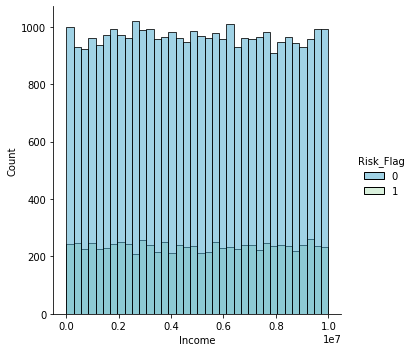

In [14]:
sns.displot(x='Income',hue='Risk_Flag',palette='GnBu_r',data=df)

## 2 - Age ☠

[]

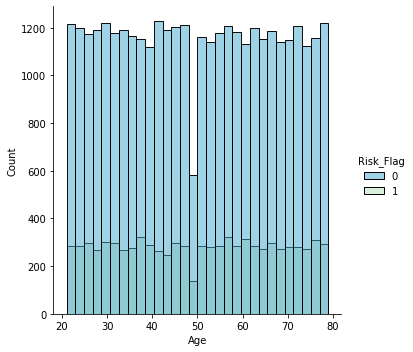

In [15]:
sns.displot(df, x="Age",palette='GnBu_r', hue="Risk_Flag",bins=30)
plt.plot()

## 3 - Experience 🤹🏿

In [16]:
df['Experience'].describe()

count    43190.000000
mean         9.975041
std          6.034418
min          0.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         20.000000
Name: Experience, dtype: float64

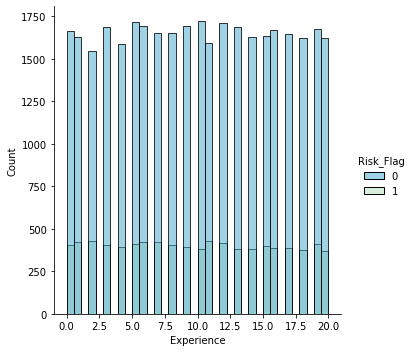

In [17]:
sns.displot(df, x="Experience",palette='GnBu_r', hue="Risk_Flag")

## 4 - Married/Single 💆

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

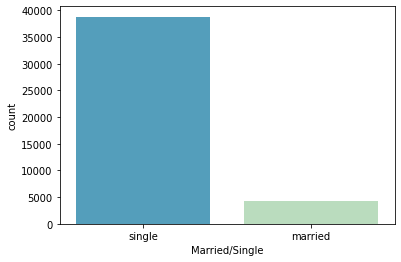

In [18]:
sns.countplot(x='Married/Single',palette='GnBu_r',data=df)

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

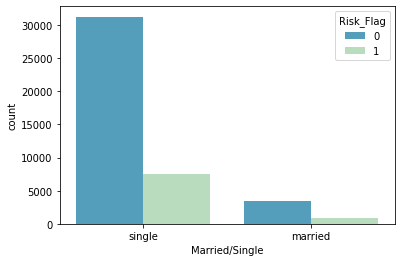

In [19]:
sns.countplot(x='Married/Single',palette='GnBu_r',hue='Risk_Flag',data=df)

## 5 - House_Ownership 🛖

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

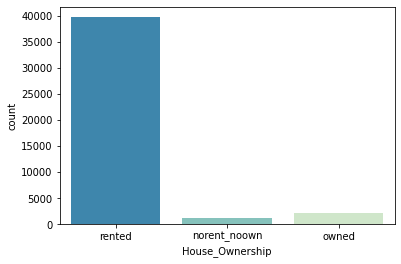

In [20]:
sns.countplot(x='House_Ownership',palette='GnBu_r',data=df)

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

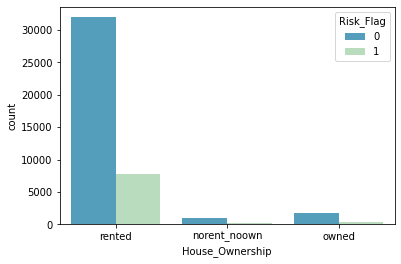

In [21]:
sns.countplot(x='House_Ownership',palette='GnBu_r',hue='Risk_Flag',data=df)

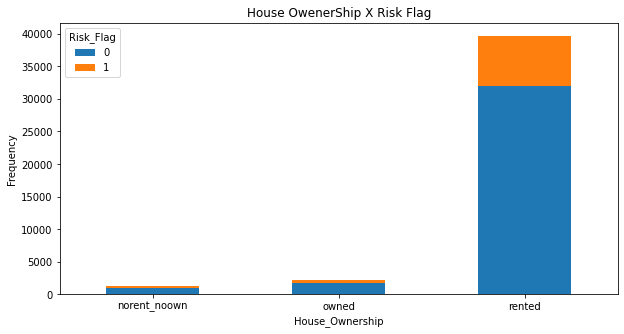

In [22]:
pd.crosstab(df.House_Ownership,df.Risk_Flag).plot(kind="bar", stacked=True, figsize=(10,5))
plt.title('House OwenerShip X Risk Flag')
plt.xlabel('House_Ownership')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## 6 - Car_Ownership 🚗

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

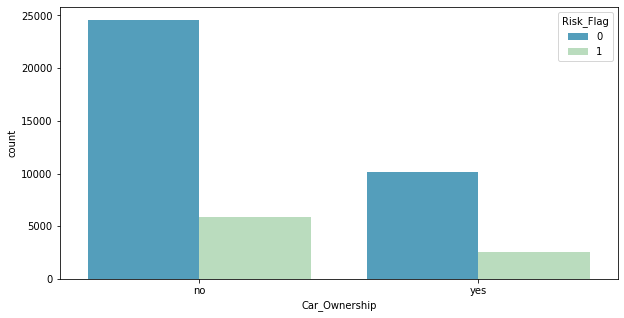

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='Car_Ownership',palette='GnBu_r',hue='Risk_Flag',data=df)

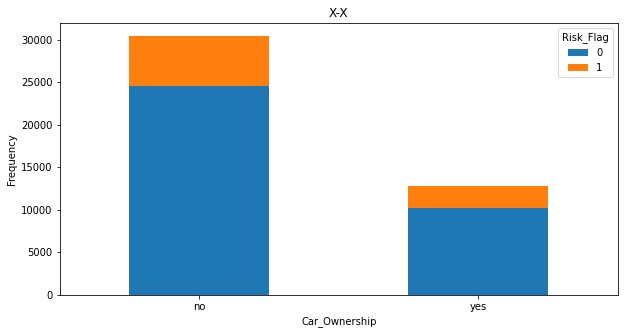

In [24]:
pd.crosstab(df.Car_Ownership,df.Risk_Flag).plot(kind="bar", stacked=True, figsize=(10,5))
plt.title('X-X')
plt.xlabel('Car_Ownership')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

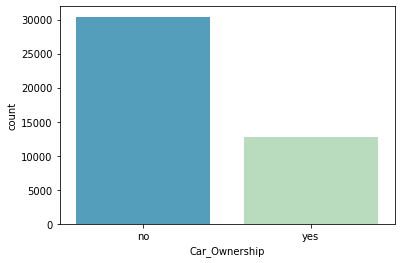

In [25]:
sns.countplot(x='Car_Ownership',palette='GnBu_r',data=df)

## 7 - Profession

<AxesSubplot:xlabel='count', ylabel='Profession'>

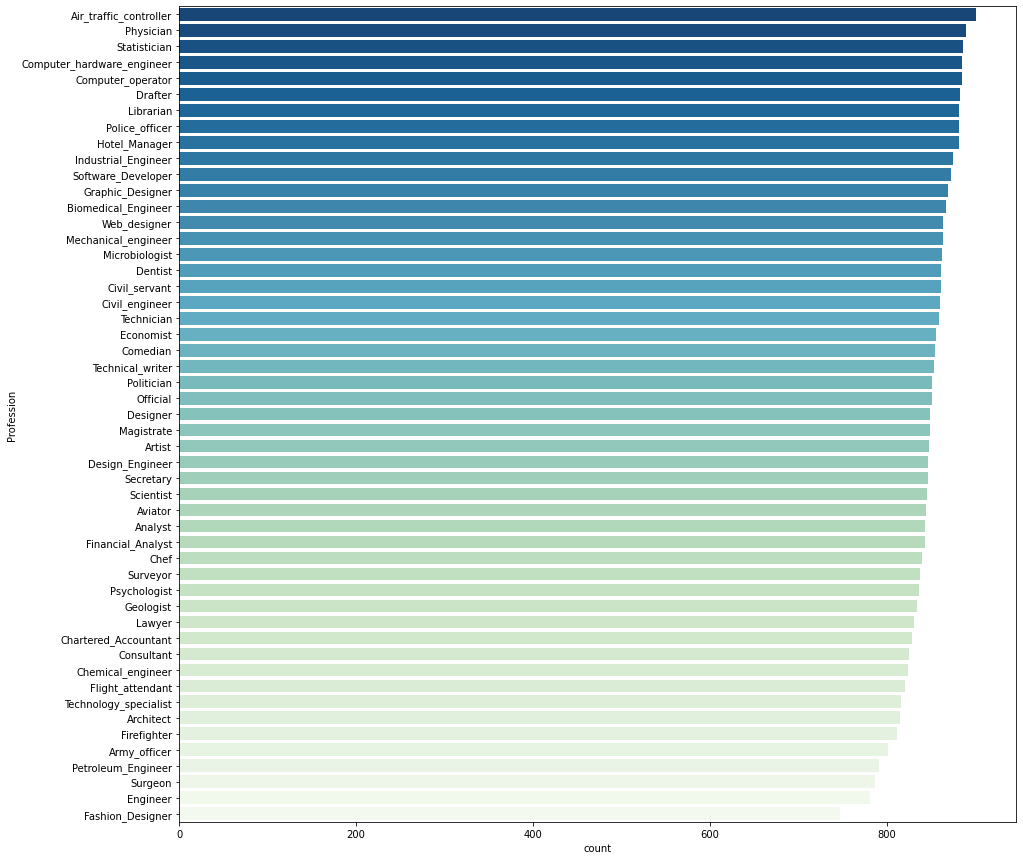

In [26]:
plt.figure(figsize=(15,15))

sns.countplot(y=df['Profession'],order=df['Profession'].value_counts().index,palette='GnBu_r')

## 87 - CITY 🏙️

In [27]:
df['CITY'].describe()

count     43190
unique      317
top       Kulti
freq        172
Name: CITY, dtype: object

In [28]:
# confusing categorical data
mp = {}
for s in df['CITY']:
    if '[' in s:
        mp[s] = '😕'
mp

{'Tiruchirappalli[10]': '😕',
 'Kota[6]': '😕',
 'Hajipur[31]': '😕',
 'Erode[17]': '😕',
 'Anantapuram[24]': '😕',
 'Aurangabad[39]': '😕',
 'Purnia[26]': '😕',
 'Eluru[25]': '😕',
 'Siwan[32]': '😕',
 'Motihari[34]': '😕',
 'Warangal[11][12]': '😕',
 'Jehanabad[38]': '😕',
 'Kishanganj[35]': '😕',
 'Tirupati[21][22]': '😕',
 'Kurnool[18]': '😕',
 'Kadapa[23]': '😕',
 'Jammu[16]': '😕',
 'Rajahmundry[19][20]': '😕',
 'Saharsa[29]': '😕',
 'Jamalpur[36]': '😕',
 'Dehri[30]': '😕',
 'Nellore[14][15]': '😕',
 'Visakhapatnam[4]': '😕',
 'Buxar[37]': '😕',
 'Ramagundam[27]': '😕',
 'Sasaram[30]': '😕',
 'Guntur[13]': '😕',
 'Chittoor[28]': '😕',
 'Bettiah[33]': '😕',
 'Mysore[7][8][9]': '😕'}

## 9 - STATE 💫

In [29]:
# confusing categorical data

mp = {}
for s in df['STATE']:
    if '[' in s:
        mp[s] = '😕'
mp

{'Uttar_Pradesh[5]': '😕'}

<AxesSubplot:xlabel='count', ylabel='STATE'>

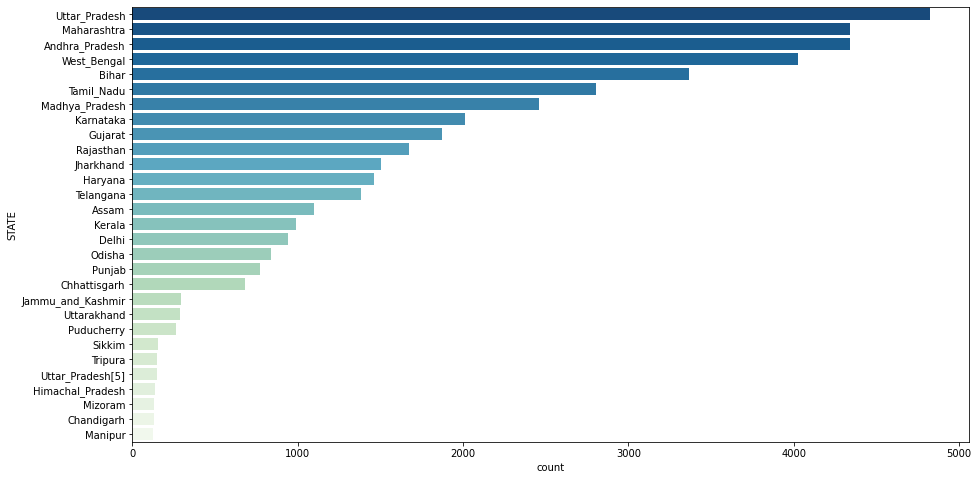

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(y=df['STATE'],order=df['STATE'].value_counts().index,palette='GnBu_r')

## 10 - CURRENT_JOB_YRS ⏰

<AxesSubplot:xlabel='count', ylabel='CURRENT_JOB_YRS'>

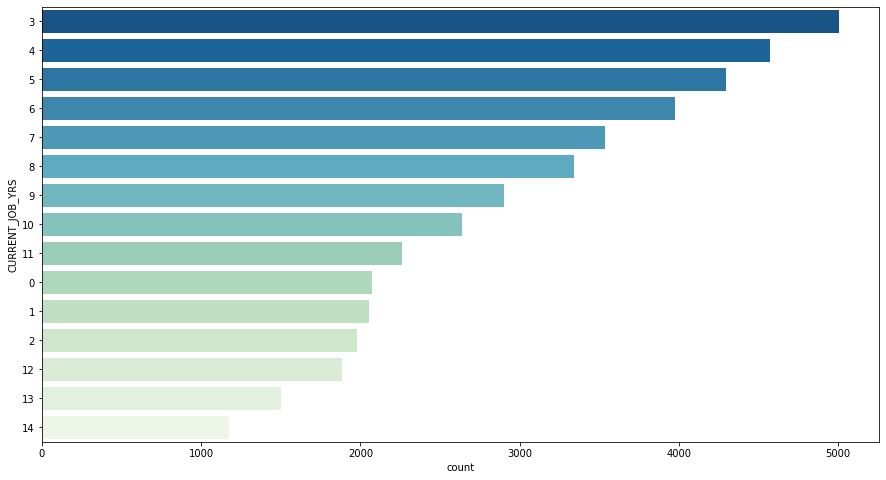

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(y=df['CURRENT_JOB_YRS'],order=df['CURRENT_JOB_YRS'].value_counts().index,palette='GnBu_r')

## 11 - CURRENT_HOUSE_YRS ⏲

In [32]:
df['CURRENT_HOUSE_YRS'].describe()

count    43190.000000
mean        12.006275
std          1.412652
min         10.000000
25%         11.000000
50%         12.000000
75%         13.000000
max         14.000000
Name: CURRENT_HOUSE_YRS, dtype: float64

In [33]:
# 😷
df['CURRENT_HOUSE_YRS'].value_counts()

13    8713
14    8652
12    8640
11    8624
10    8561
Name: CURRENT_HOUSE_YRS, dtype: int64

<AxesSubplot:xlabel='count', ylabel='CURRENT_HOUSE_YRS'>

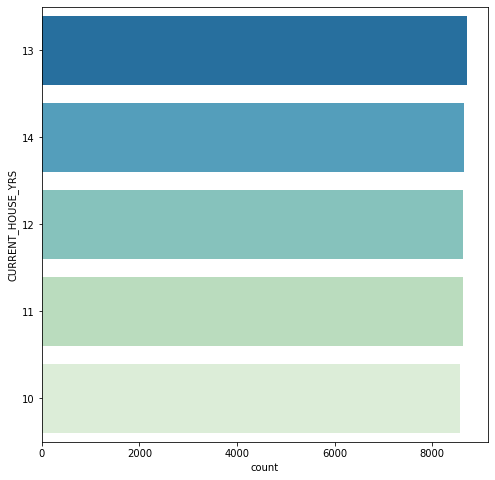

In [34]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['CURRENT_HOUSE_YRS'],order=df['CURRENT_HOUSE_YRS'].value_counts().index,palette='GnBu_r')

## 12 - Risk_Flag ⛔

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

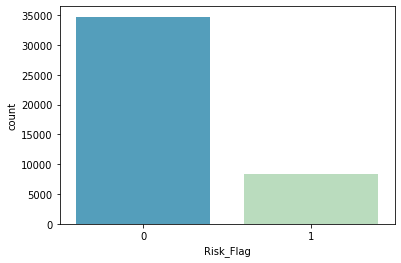

In [35]:
sns.countplot(x=df['Risk_Flag'],palette='GnBu_r')

## 🐚 whole dataset inspection

In [36]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,4.319000e+04,43190.000000,43190.000000,43190.000000,43190.000000,43190.000000
mean,4.999184e+06,49.917411,9.975041,6.298981,12.006275,0.195485
std,2.883155e+06,17.056702,6.034418,3.663603,1.412652,0.396578
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.508307e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,4.984654e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.494142e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


<AxesSubplot:>

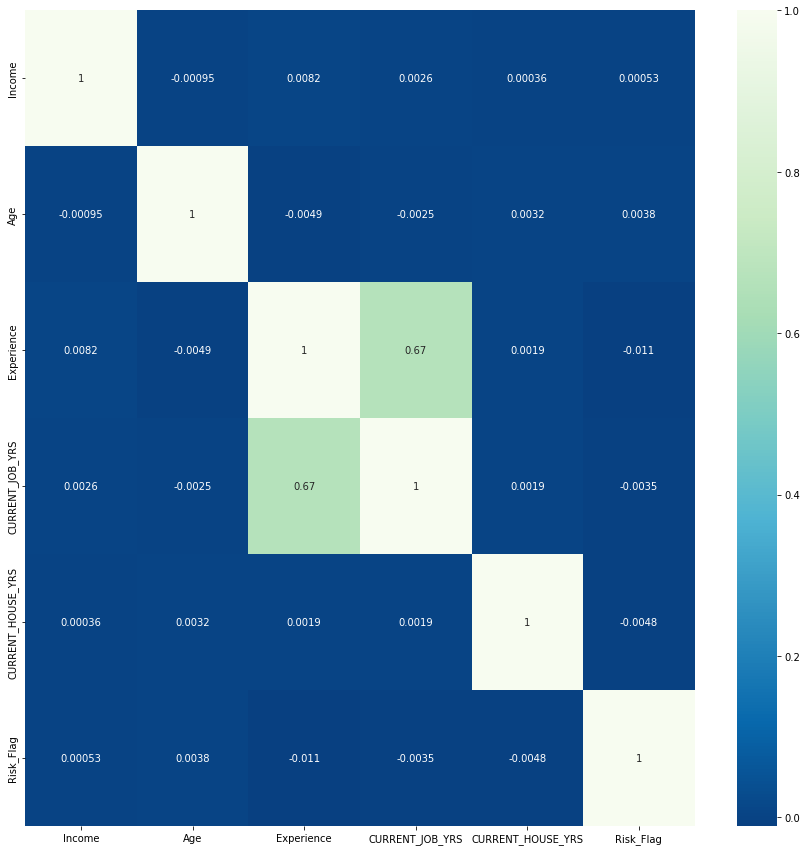

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,cmap="GnBu_r")

#  <i style="font-size: 2em">🔖</i>3 - Data Preprocessing <i style="font-size: 5em">🛠️</i>


In [38]:
df.isna().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43190 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Income             43190 non-null  int64 
 1   Age                43190 non-null  int64 
 2   Experience         43190 non-null  int64 
 3   Married/Single     43190 non-null  object
 4   House_Ownership    43190 non-null  object
 5   Car_Ownership      43190 non-null  object
 6   Profession         43190 non-null  object
 7   CITY               43190 non-null  object
 8   STATE              43190 non-null  object
 9   CURRENT_JOB_YRS    43190 non-null  int64 
 10  CURRENT_HOUSE_YRS  43190 non-null  int64 
 11  Risk_Flag          43190 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.3+ MB


#  <i style="font-size: 2em">🔖</i>4 - Data Engineering <i style="font-size: 5em">🧑🏻‍🔬</i>


## Clean Up 🔪

In [40]:
exclude = ['Risk_Flag','STATE','CITY','CURRENT_HOUSE_YRS','CURRENT_JOB_YRS']
numeric = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
categorical = ['Profession']
dummies = ['Married/Single', 'House_Ownership', 'Car_Ownership']

In [41]:
for n in numeric:
    print(n,df[n].value_counts().shape)

Income (41920,)
Age (59,)
Experience (21,)
CURRENT_JOB_YRS (15,)
CURRENT_HOUSE_YRS (5,)


In [42]:
for c in categorical:
    print(c,df[c].value_counts().shape)

Profession (51,)


In [43]:
pf = pd.get_dummies(df,columns=dummies)

In [44]:
for col in categorical:
    pf[col] = LabelEncoder().fit_transform(pf[col])

## 💦 feature separation

In [45]:
X = pf.drop(exclude, axis=1)
y = pf["Risk_Flag"]

## 📏 StandScaling

In [46]:
sc = StandardScaler()
X = sc.fit_transform(X)

## 📏 MinMaxScaling

In [47]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

## ☯ Oversampling with - synthetic minority oversampling technique

In [48]:
print('X.shape: ',X.shape,'\ny.shape: ',y.shape)
print('Rick Flag\n',y.value_counts())

X.shape:  (43190, 11) 
y.shape:  (43190,)
Rick Flag
 0    34747
1     8443
Name: Risk_Flag, dtype: int64


In [49]:
X, y = SMOTE().fit_resample(X, y)

In [50]:
print('X.shape: ',X.shape,'\ny.shape: ',y.shape)
print('Rick Flag\n',y.value_counts())

X.shape:  (69494, 11) 
y.shape:  (69494,)
Rick Flag
 0    34747
1    34747
Name: Risk_Flag, dtype: int64


# <i style="font-size: 2em">🔖</i>5 - Spliting Data <i style="font-size: 5em">🪓</i>

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = np.random.randint(100))

In [52]:
### utility function for testing testcases
def tester(x,y,model):
    
    # testing
    y_pred = model.predict(x)
    
    # printing model names
    pretty(f'<i style="font-size: 8em;display: block;text-align: center;">💃🏻</i>')
    pretty(f'{repr(model)}','#1e66f5')
    
    # classification report
    c_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
    sns.set(font_scale=1.8)
    plt.figure(figsize=(20,12))
    plt.title("Classification Report", fontsize=50);
    plt.tick_params(labelbottom=False, labeltop=True)
    sns.heatmap(c_report,
                annot=True,
                fmt='g',
                cbar=False,
                cmap="GnBu_r",
                yticklabels = ["0","1",'accuracy','macro-avg','weighted-avg'],
                annot_kws={ 'fontsize': 16}
               )
    
    # other metrix
    pretty(f'accuracy_score: {accuracy_score(y,y_pred)*100:.2f}')

    pretty(f'precision_score: {precision_score(y,y_pred)*100:.2f}')
    pretty(f'recall_score: {recall_score(y,y_pred)*100:.2f}')
    pretty(f'f1-score: {f1_score(y,y_pred)*100:.2f}')

    fpr, tpr, _= roc_curve(y,y_pred)
    pretty(f'auc: {auc(fpr,tpr)*100:.2f}')
    pretty(f'roc_auc_score: {roc_auc_score(y,y_pred)*100:.2f}')
    
    
    # 😕 Matrix
    sns.set(font_scale=2.5)
    plt.figure(figsize=(20,5))
    plt.title("😕 Matrix 😕", fontsize=50);
    sns.heatmap(confusion_matrix(y, y_pred),
                annot=True,
                fmt='g',
                xticklabels = ["Safe","Risky"],
                yticklabels = ["Safe","Risky"],
                cmap="Greens",
                cbar=False,
                annot_kws={ 'fontsize': 32}
               )

# <i style="font-size: 2em">🔖</i>6 - Running Models <i style="font-size: 5em">🏃🏻‍♀️💨</i>


# 1 - Logistic Regresstion


<div style="color: #7287fd; font-size: 2em;"><i style="font-size: 8em;display: block;text-align: center;">💃🏻</i></div>

<div style="color: #1e66f5; font-size: 2em;">LogisticRegression(random_state=54)</div>

<div style="color: #7287fd; font-size: 2em;">accuracy_score: 50.41</div>

<div style="color: #7287fd; font-size: 2em;">precision_score: 49.76</div>

<div style="color: #7287fd; font-size: 2em;">recall_score: 55.86</div>

<div style="color: #7287fd; font-size: 2em;">f1-score: 52.63</div>

<div style="color: #7287fd; font-size: 2em;">auc: 50.49</div>

<div style="color: #7287fd; font-size: 2em;">roc_auc_score: 50.49</div>

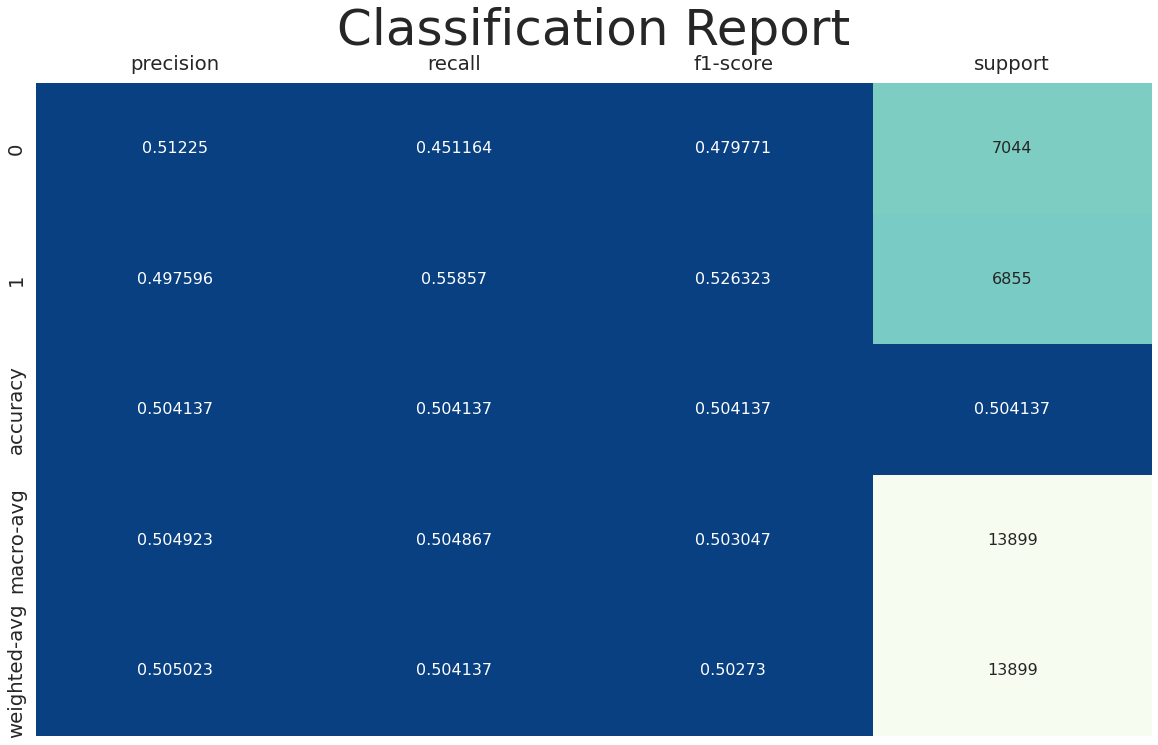

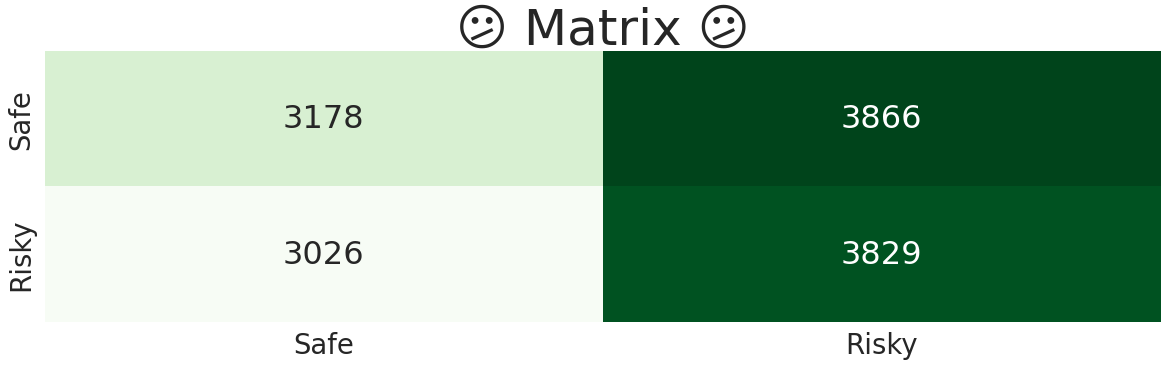

In [53]:
LR_clf = LogisticRegression(random_state=np.random.randint(100))
LR_clf.fit(X_train, y_train)
tester(X_test,y_test,LR_clf)

# 2 - Naive Bayes | Gaussian

<div style="color: #7287fd; font-size: 2em;"><i style="font-size: 8em;display: block;text-align: center;">💃🏻</i></div>

<div style="color: #1e66f5; font-size: 2em;">GaussianNB()</div>

<div style="color: #7287fd; font-size: 2em;">accuracy_score: 49.92</div>

<div style="color: #7287fd; font-size: 2em;">precision_score: 49.08</div>

<div style="color: #7287fd; font-size: 2em;">recall_score: 41.37</div>

<div style="color: #7287fd; font-size: 2em;">f1-score: 44.90</div>

<div style="color: #7287fd; font-size: 2em;">auc: 49.80</div>

<div style="color: #7287fd; font-size: 2em;">roc_auc_score: 49.80</div>

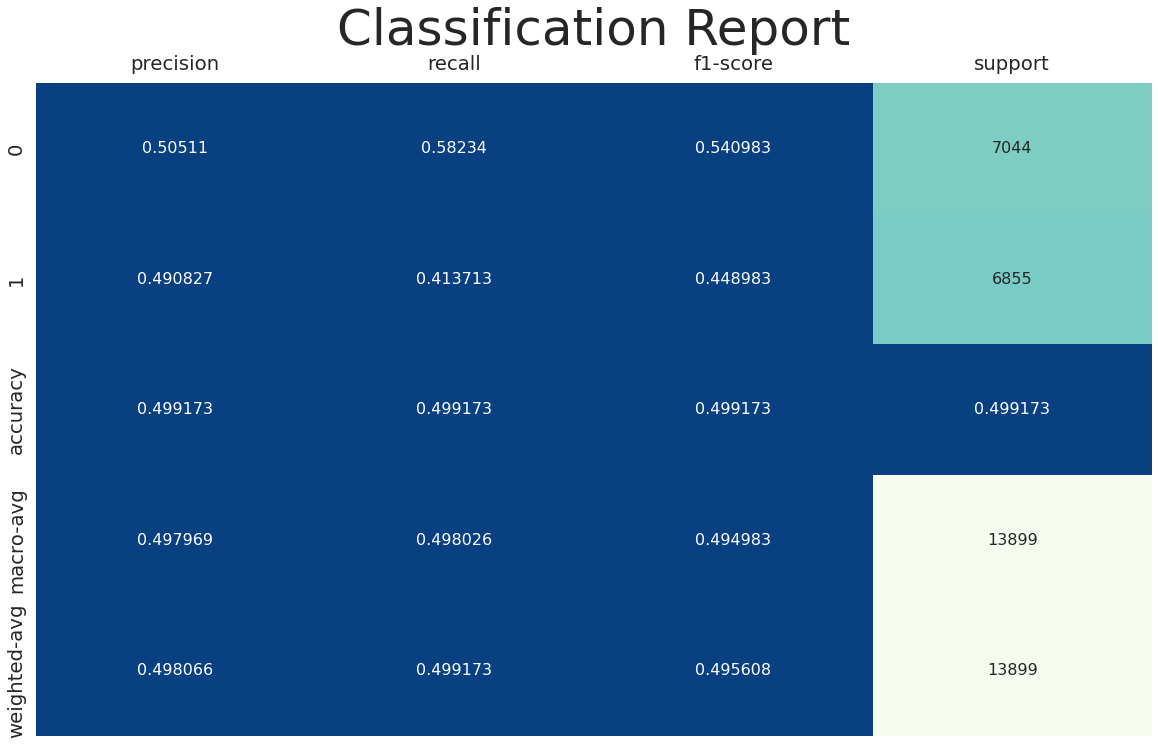

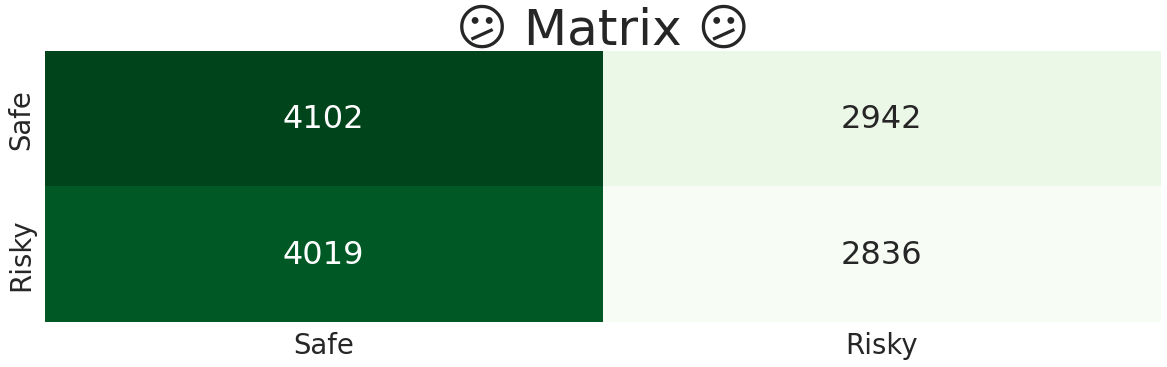

In [54]:
GNB_clr = GaussianNB()
GNB_clr.fit(X_train, y_train)
tester(X_test,y_test,GNB_clr)

# 3 - SVM - Support Vector Machine

<div style="color: #7287fd; font-size: 2em;"><i style="font-size: 8em;display: block;text-align: center;">💃🏻</i></div>

<div style="color: #1e66f5; font-size: 2em;">SVC(kernel='linear', max_iter=1000)</div>

<div style="color: #7287fd; font-size: 2em;">accuracy_score: 50.38</div>

<div style="color: #7287fd; font-size: 2em;">precision_score: 49.71</div>

<div style="color: #7287fd; font-size: 2em;">recall_score: 53.39</div>

<div style="color: #7287fd; font-size: 2em;">f1-score: 51.49</div>

<div style="color: #7287fd; font-size: 2em;">auc: 50.42</div>

<div style="color: #7287fd; font-size: 2em;">roc_auc_score: 50.42</div>

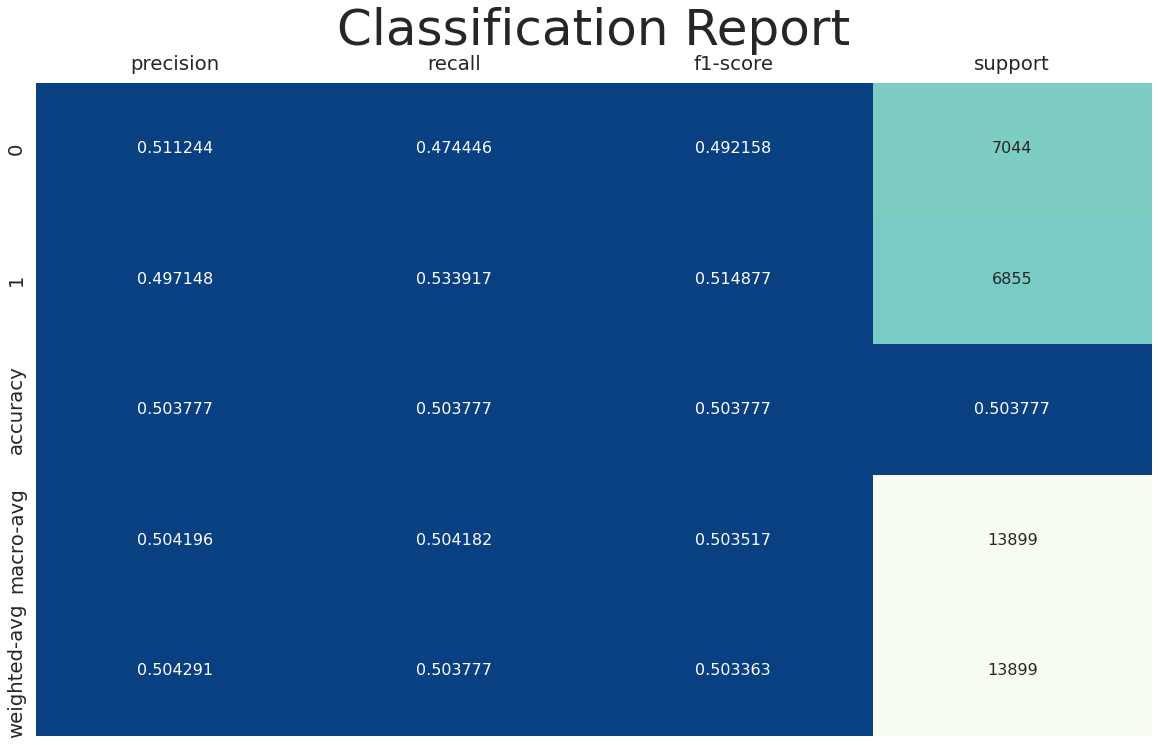

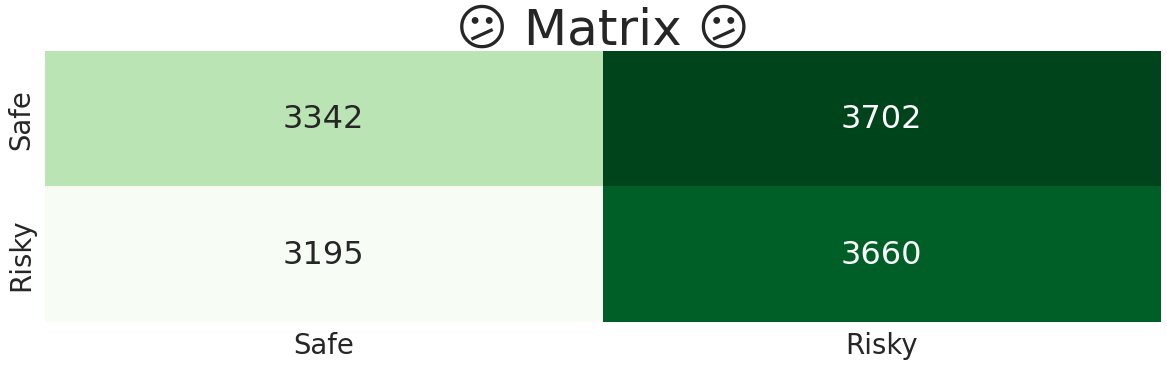

In [55]:
svc_clf = SVC(kernel='linear', max_iter=1000)
svc_clf.fit(X_train,y_train)
tester(X_test,y_test,svc_clf)

# 4 - Decision Tree

<div style="color: #7287fd; font-size: 2em;"><i style="font-size: 8em;display: block;text-align: center;">💃🏻</i></div>

<div style="color: #1e66f5; font-size: 2em;">DecisionTreeClassifier(max_leaf_nodes=50)</div>

<div style="color: #7287fd; font-size: 2em;">accuracy_score: 76.55</div>

<div style="color: #7287fd; font-size: 2em;">precision_score: 100.00</div>

<div style="color: #7287fd; font-size: 2em;">recall_score: 52.46</div>

<div style="color: #7287fd; font-size: 2em;">f1-score: 68.82</div>

<div style="color: #7287fd; font-size: 2em;">auc: 76.23</div>

<div style="color: #7287fd; font-size: 2em;">roc_auc_score: 76.23</div>

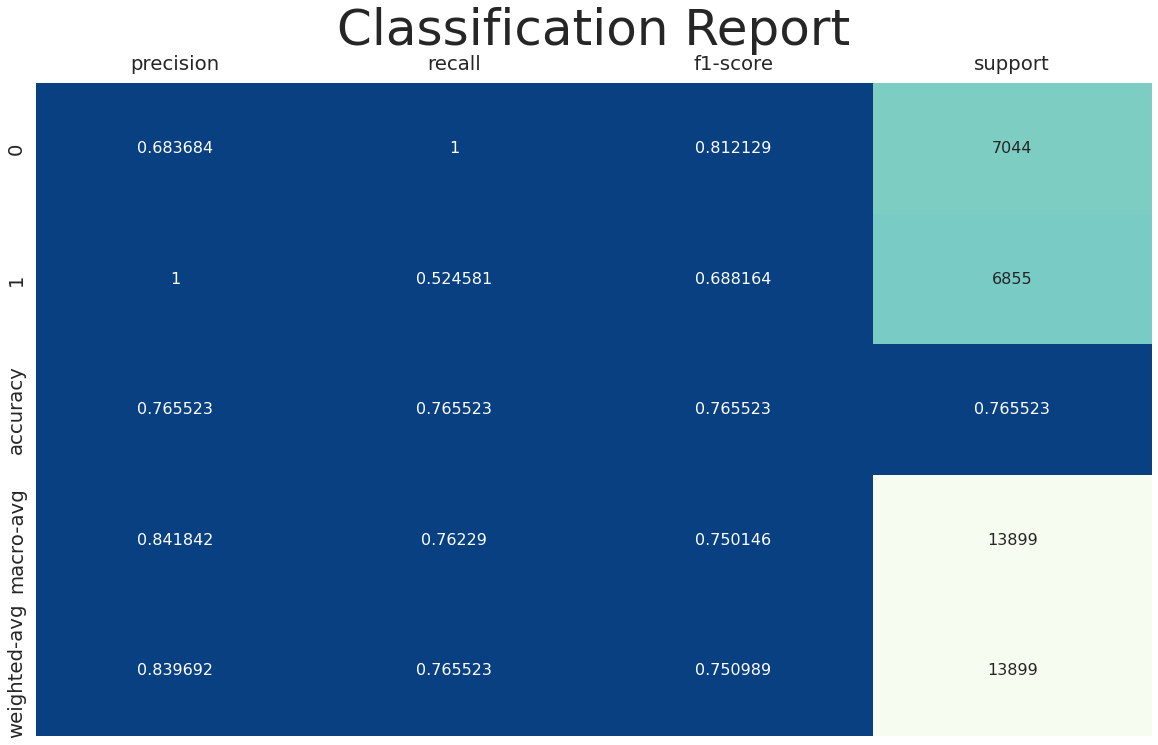

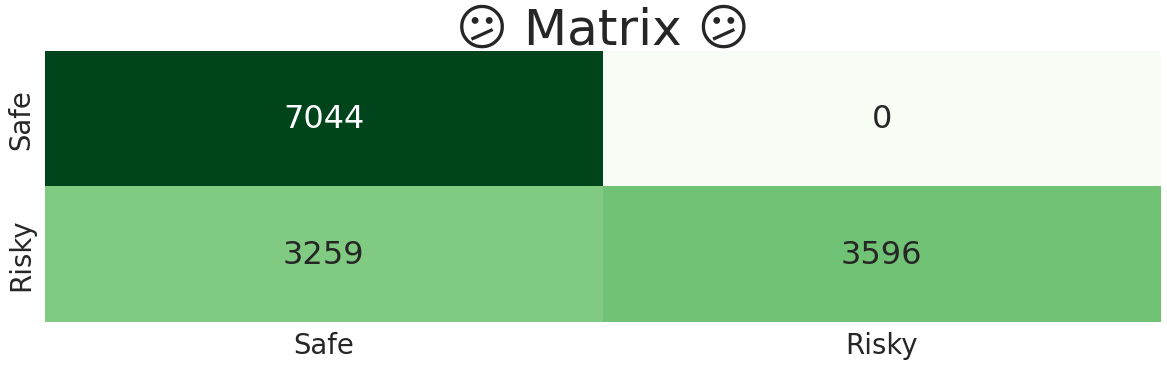

In [56]:
DT_clf = DecisionTreeClassifier(max_leaf_nodes=50)
DT_clf.fit(X_train,y_train)
tester(X_test,y_test,DT_clf)

# 5 - K-nearest neighbor

<div style="color: #7287fd; font-size: 2em;"><i style="font-size: 8em;display: block;text-align: center;">💃🏻</i></div>

<div style="color: #1e66f5; font-size: 2em;">KNeighborsClassifier(n_neighbors=1)</div>

<div style="color: #7287fd; font-size: 2em;">accuracy_score: 77.70</div>

<div style="color: #7287fd; font-size: 2em;">precision_score: 72.81</div>

<div style="color: #7287fd; font-size: 2em;">recall_score: 87.45</div>

<div style="color: #7287fd; font-size: 2em;">f1-score: 79.46</div>

<div style="color: #7287fd; font-size: 2em;">auc: 77.83</div>

<div style="color: #7287fd; font-size: 2em;">roc_auc_score: 77.83</div>

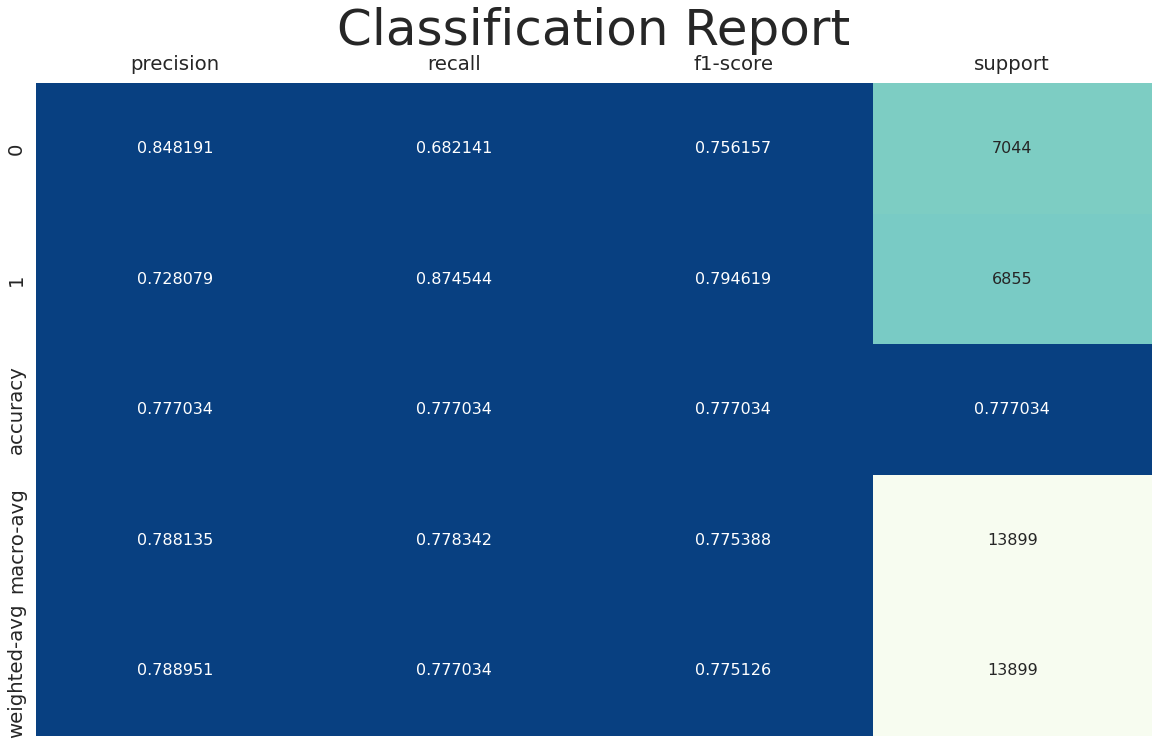

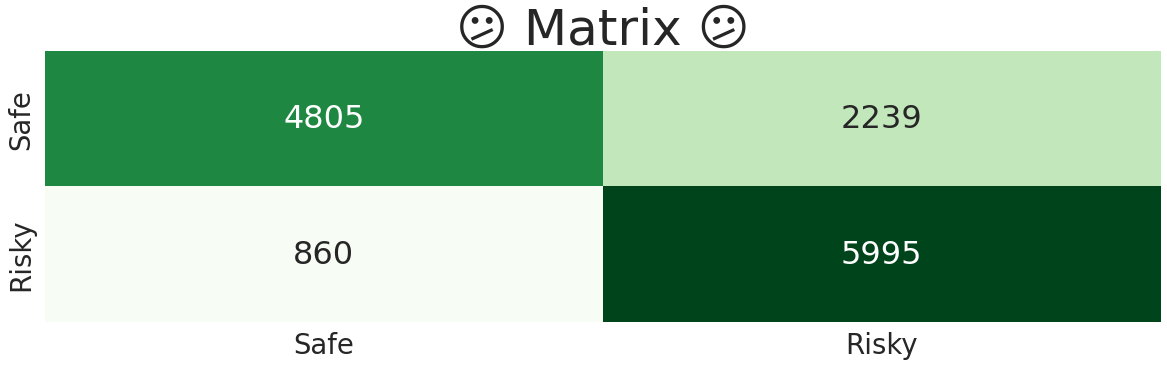

In [57]:
KN_clf = KNeighborsClassifier(n_neighbors=1)
KN_clf.fit(X_train,y_train)
tester(X_test,y_test,KN_clf)

# 6 - Random Forest - 🥉

<div style="color: #7287fd; font-size: 2em;"><i style="font-size: 8em;display: block;text-align: center;">💃🏻</i></div>

<div style="color: #1e66f5; font-size: 2em;">RandomForestClassifier(max_leaf_nodes=1000, n_estimators=1000, random_state=1)</div>

<div style="color: #7287fd; font-size: 2em;">accuracy_score: 79.99</div>

<div style="color: #7287fd; font-size: 2em;">precision_score: 84.10</div>

<div style="color: #7287fd; font-size: 2em;">recall_score: 73.29</div>

<div style="color: #7287fd; font-size: 2em;">f1-score: 78.32</div>

<div style="color: #7287fd; font-size: 2em;">auc: 79.90</div>

<div style="color: #7287fd; font-size: 2em;">roc_auc_score: 79.90</div>

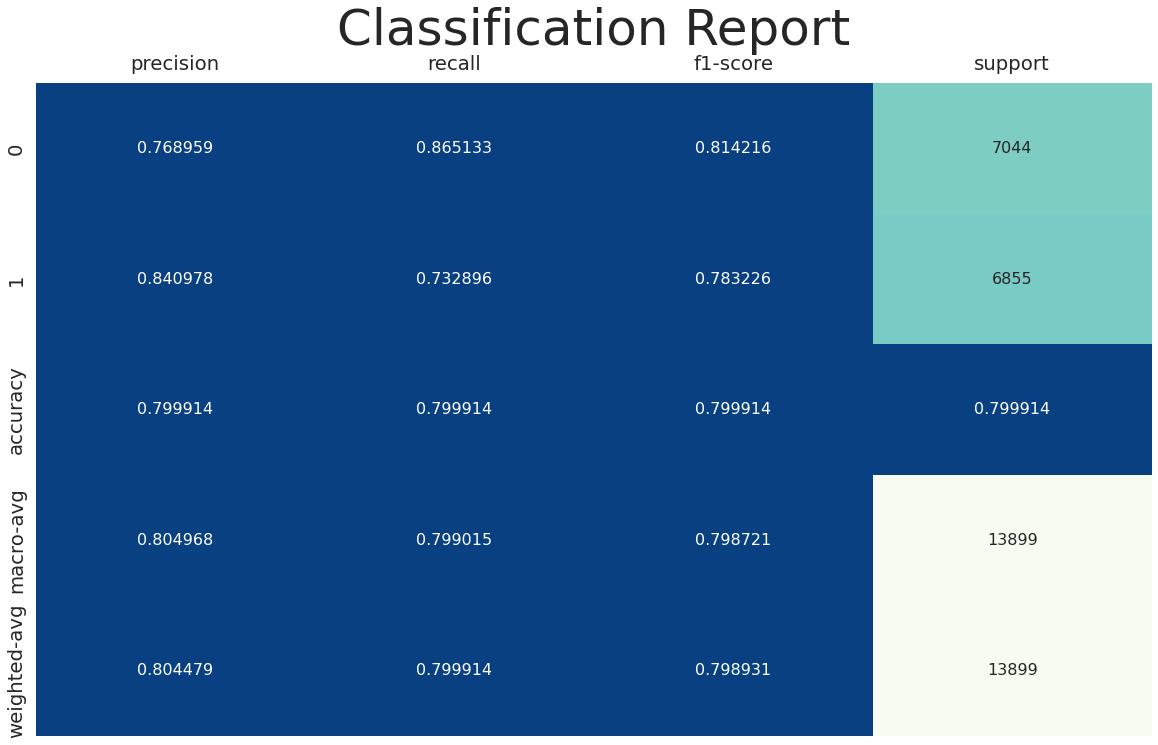

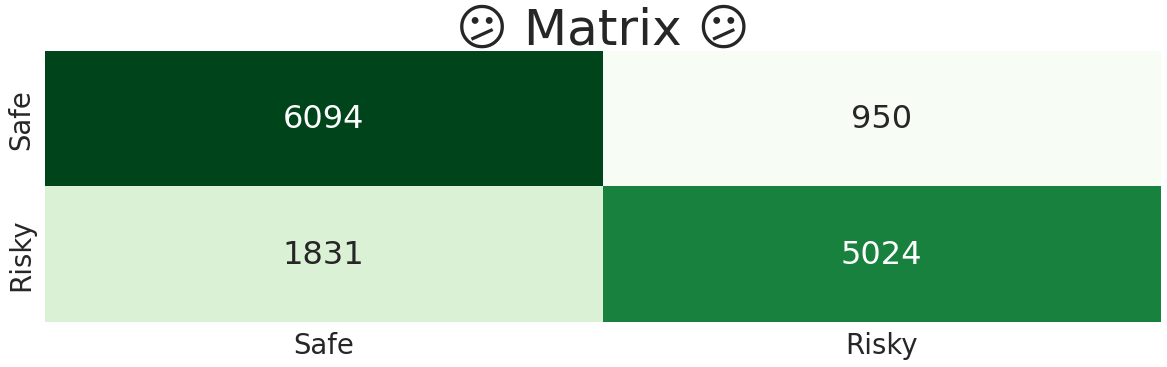

In [58]:
RF_clf = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=1000)
RF_clf.fit(X_train,y_train)
tester(X_test,y_test,RF_clf)

# 7 - Gradient Boosting - 🥈

<div style="color: #7287fd; font-size: 2em;"><i style="font-size: 8em;display: block;text-align: center;">💃🏻</i></div>

<div style="color: #1e66f5; font-size: 2em;">GradientBoostingClassifier(max_depth=8, max_leaf_nodes=100, n_estimators=400,
                           subsample=0.5)</div>

<div style="color: #7287fd; font-size: 2em;">accuracy_score: 86.73</div>

<div style="color: #7287fd; font-size: 2em;">precision_score: 96.22</div>

<div style="color: #7287fd; font-size: 2em;">recall_score: 76.09</div>

<div style="color: #7287fd; font-size: 2em;">f1-score: 84.98</div>

<div style="color: #7287fd; font-size: 2em;">auc: 86.59</div>

<div style="color: #7287fd; font-size: 2em;">roc_auc_score: 86.59</div>

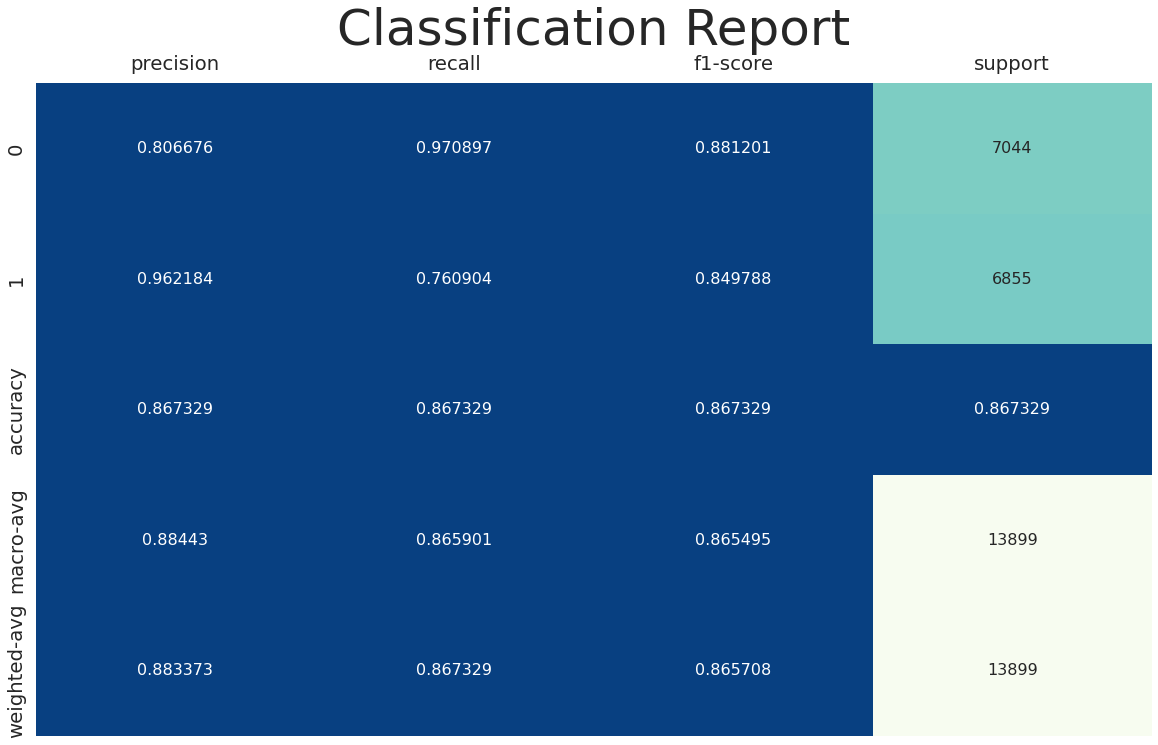

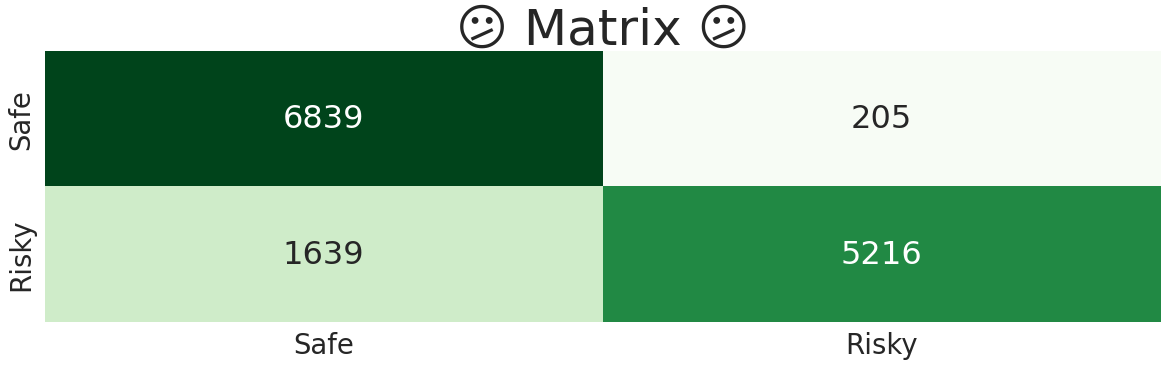

In [59]:
GB_clf = GradientBoostingClassifier(subsample=0.5,
                                    n_estimators=400,
                                    max_depth=8,
                                    max_leaf_nodes=100)
GB_clf.fit(X_train,y_train)
tester(X_test,y_test,GB_clf)

# 8 - XGB - Extreme Gradient Boosting - 🥇

<div style="color: #7287fd; font-size: 2em;"><i style="font-size: 8em;display: block;text-align: center;">💃🏻</i></div>

<div style="color: #1e66f5; font-size: 2em;">XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=435,
              reg_alpha=0, reg_lambda=1, ...)</div>

<div style="color: #7287fd; font-size: 2em;">accuracy_score: 87.57</div>

<div style="color: #7287fd; font-size: 2em;">precision_score: 99.59</div>

<div style="color: #7287fd; font-size: 2em;">recall_score: 75.11</div>

<div style="color: #7287fd; font-size: 2em;">f1-score: 85.64</div>

<div style="color: #7287fd; font-size: 2em;">auc: 87.41</div>

<div style="color: #7287fd; font-size: 2em;">roc_auc_score: 87.41</div>

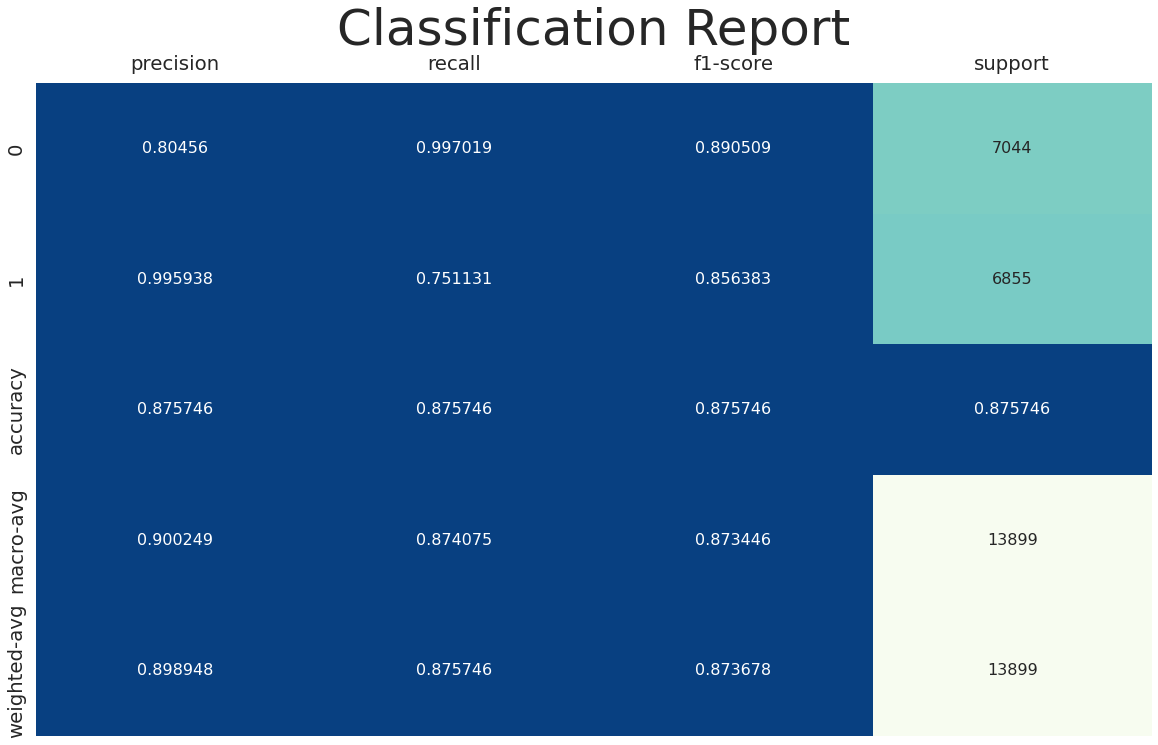

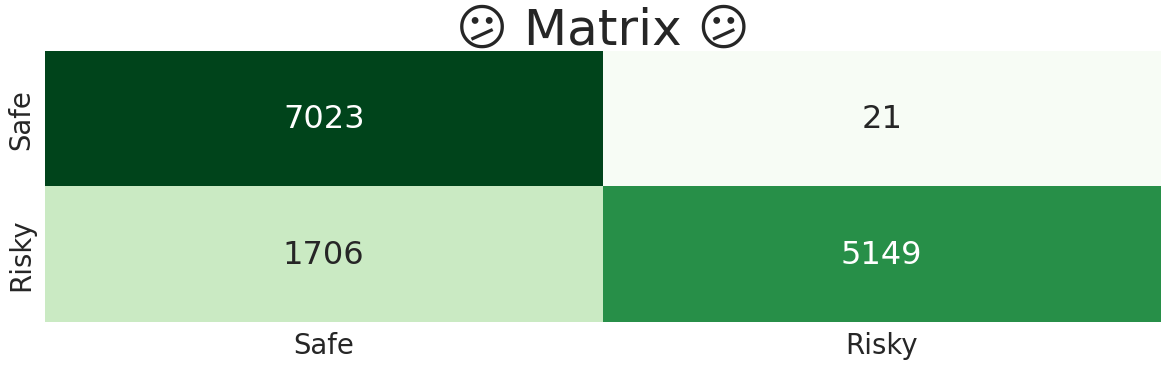

In [60]:
XGB_clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=400, 
                    random_state=np.random.randint(1000))
XGB_clf.fit(X_train,y_train)
tester(X_test,y_test,XGB_clf)